In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 


In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd 
import scipy.io as sio

In [3]:
from fastai import *

In [211]:
# !wget https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz
# !tar xvf car_devkit.tgz
# !wget http://imagenet.stanford.edu/internal/car196/cars_train.tgz
# !tar xvf cars_train.tgz
# !mkdir stanford-cars-v2
# !mv cars_train.tgz stanford-cars-v2/
# !tar xvf stanford-cars-v2/cars_train.tgz --directory stanford-cars-v2/

# !mv car_devkit.tgz stanford-cars-v2/
# !tar xvf stanford-cars-v2/car_devkit.tgz --directory stanford-cars-v2/


--2020-03-06 17:38:37--  https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 330960 (323K) [application/x-gzip]
Saving to: ‘car_devkit.tgz’

car_devkit.tgz      100%[===================>] 323.20K  1.78MB/s    in 0.2s    

2020-03-06 17:38:37 (1.78 MB/s) - ‘car_devkit.tgz’ saved [330960/330960]



In [4]:
home_directory = Path(os.getcwd())

In [5]:
devkit_dir = home_directory/'stanford-cars-v2'/'devkit'
cars_train_dir = home_directory/'stanford-cars-v2'/'cars_train'
devkit_dir.ls()

[PosixPath('/home/thomassw66/stanford-cars-v2/devkit/cars_test_annos.mat'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/cars_meta.mat'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/converted_to_dataframe'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/cars_train_annos.mat'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/eval_train.m'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/converted_to_dataframe.csv'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/train_perfect_preds.txt'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/README.txt')]

In [6]:
train_annotations = sio.loadmat(devkit_dir/'cars_train_annos.mat')
train_annotations['annotations'].dtype

dtype([('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('fname', 'O')])

In [7]:
cars_meta = sio.loadmat(devkit_dir/'cars_meta.mat')

In [8]:
cars_meta["class_names"]


array([[array(['AM General Hummer SUV 2000'], dtype='<U26'), array(['Acura RL Sedan 2012'], dtype='<U19'),
        array(['Acura TL Sedan 2012'], dtype='<U19'), array(['Acura TL Type-S 2008'], dtype='<U20'), ...,
        array(['Volvo C30 Hatchback 2012'], dtype='<U24'), array(['Volvo 240 Sedan 1993'], dtype='<U20'),
        array(['Volvo XC90 SUV 2007'], dtype='<U19'), array(['smart fortwo Convertible 2012'], dtype='<U29')]],
      dtype=object)

In [9]:
import matplotlib.pyplot as plt 

def show_img(im, figsize=None, ax=None):
    if not ax: fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

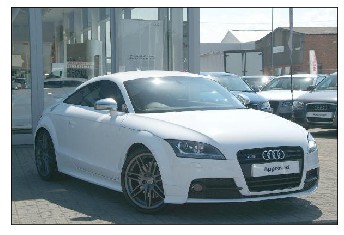

In [10]:
img_path = cars_train_dir/'00001.jpg'
im = plt.imread(str(img_path))
ax = show_img(im)

In [11]:
train_annotations['annotations'][0, 0][4][0]

array([14], dtype=uint8)

In [12]:
cars_meta["class_names"][0, 14]

array(['Audi R8 Coupe 2012'], dtype='<U18')

Seems like a plausible label ^^

In [13]:
def make_dataframe():
    cars_annos = sio.loadmat(devkit_dir/'cars_train_annos.mat')
    cars_meta = sio.loadmat(devkit_dir/'cars_meta.mat') 
    
    nclasses = len(cars_meta["class_names"][0])
    assert nclasses == 196 
    
    class_names = dict(zip(range(1, nclasses+1), [c[0] for c in cars_meta['class_names'][0]]))
    
    dataset = [] 
    for i, arr in enumerate(cars_annos['annotations'][0]):
        dataset.append([ y[0][0] for y in arr ][:-1] + [arr[-1][0]])
    temp_df = pd.DataFrame(dataset, columns = ['bbox_x1', 'bbox_y1', 'bbox_x2', 'bbox_y2', 'ClassID', 'filename'])
    temp_df = temp_df.assign(ClassName = temp_df.ClassID.map(dict(class_names)))
    return temp_df
    

In [14]:
data_frame = make_dataframe()
data_frame.head(4)

,bbox_x1,bbox_y1,bbox_x2,bbox_y2,ClassID,filename,ClassName
0,39,116,569,375,14,00001.jpg,Audi TTS Coupe 2012
1,36,116,868,587,3,00002.jpg,Acura TL Sedan 2012
2,85,109,601,381,91,00003.jpg,Dodge Dakota Club Cab 2007
3,621,393,1484,1096,134,00004.jpg,Hyundai Sonata Hybrid Sedan 2012


In [15]:
data_frame.to_csv(devkit_dir/"converted_to_dataframe.csv")

In [16]:
devkit_dir.ls()

[PosixPath('/home/thomassw66/stanford-cars-v2/devkit/cars_test_annos.mat'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/cars_meta.mat'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/converted_to_dataframe'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/cars_train_annos.mat'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/eval_train.m'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/converted_to_dataframe.csv'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/train_perfect_preds.txt'),
 PosixPath('/home/thomassw66/stanford-cars-v2/devkit/README.txt')]

In [17]:
SEED = 42
np.random.seed(SEED)

In [18]:
bs = 16 
image_size = 224

In [19]:
tfms = get_transforms(); tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do

In [20]:
# db = ImageDataBunch.from_df(path = cars_train_dir, ds_tfms=get_transforms(), df = data_frame, bs=32, seed=SEED, size=224, fn_col="filename", label_col="ClassName").normalize(imagenet_stats)
db = ImageDataBunch.from_df(
    path = cars_train_dir, 
    ds_tfms=tfms, 
    df = data_frame, 
    bs=bs, 
    seed=SEED, 
    valid_pct = 0.2,
    size=image_size, 
    fn_col="filename", 
    label_col="ClassName"
).normalize(imagenet_stats)



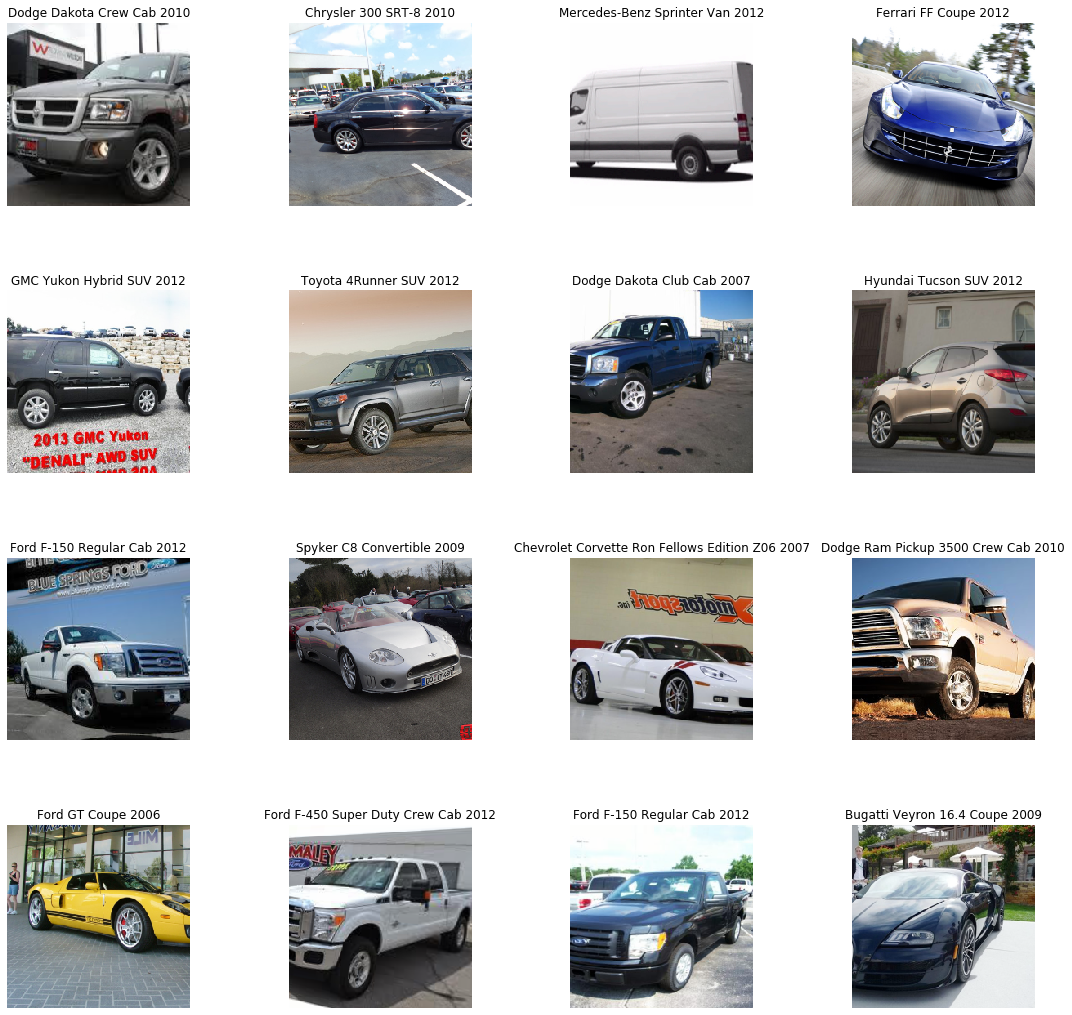

In [21]:
db.show_batch(rows=5, figsize=(15,15))

In [22]:
learn = cnn_learner (db, models.densenet121, metrics=[error_rate, accuracy, top_k_accuracy])

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /home/thomassw66/.cache/torch/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:02<00:00, 14.6MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


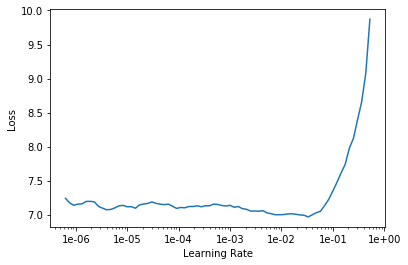

In [23]:
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(14, max_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,5.734547,4.357964,0.898034,0.101966,0.285627,01:19
1,3.898317,2.845692,0.676290,0.323710,0.621622,01:18
2,3.266515,2.362832,0.583538,0.416462,0.721744,01:18
3,3.110374,2.217726,0.559582,0.440418,0.772113,01:18
4,2.437113,1.835564,0.465602,0.534398,0.818796,01:18
5,2.296798,1.588161,0.415233,0.584767,0.857494,01:18
6,1.916870,1.332491,0.353808,0.646192,0.880835,01:18
7,1.533242,1.157532,0.315725,0.684275,0.900491,01:18
8,1.227329,0.988802,0.277027,0.722973,0.922604,01:18
9,0.984648,0.918271,0.243243,0.756757,0.925061,01:19


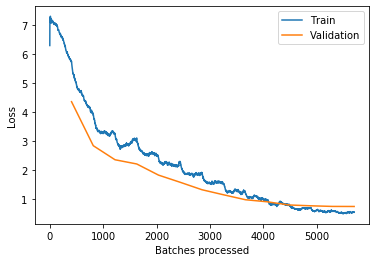

In [26]:
learn.recorder.plot_losses()

In [27]:
learn.save('stage-1-densenet-151-14-epoch')

In [35]:
# learn.load('stage-1-resnet50-14-epoch')
learn.load('stage-1-densenet-151-14-epoch');

In [36]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


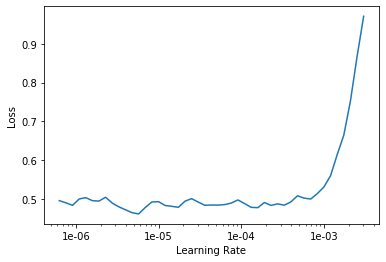

In [37]:
learn.lr_find()
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(10, slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,top_k_accuracy,time
0,0.577890,0.758731,0.203317,0.796683,0.941646,01:31
1,0.533191,0.743906,0.200246,0.799754,0.945332,01:31
2,0.514642,0.734571,0.199631,0.800369,0.943489,01:31
3,0.474001,0.745845,0.202703,0.797297,0.941646,01:31
4,0.468204,0.719278,0.197174,0.802826,0.945946,01:32
5,0.483113,0.717516,0.194717,0.805283,0.945946,01:32
6,0.450658,0.719186,0.197174,0.802826,0.949017,01:31
7,0.413844,0.714554,0.197174,0.802826,0.948403,01:32
8,0.419459,0.703853,0.191032,0.808968,0.949631,01:31
9,0.454241,0.705099,0.195332,0.804668,0.947174,01:31


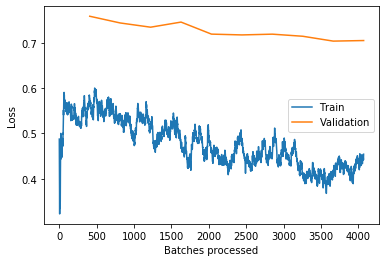

In [39]:
learn.recorder.plot_losses()

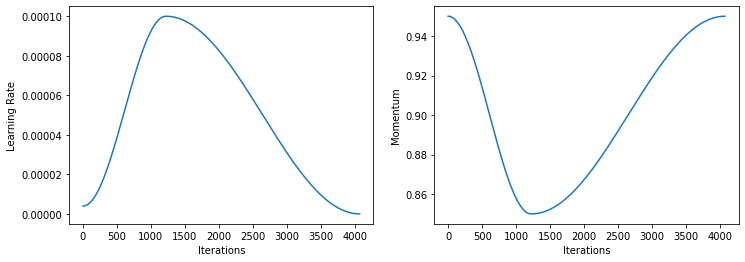

In [43]:
learn.recorder.plot_lr(show_moms=True)

In [40]:
learn.save('stage-2-densenet-151-14-epoch')

** Training With Full Images **

In [49]:
db = ImageDataBunch.from_df(
    path = cars_train_dir, 
    ds_tfms=tfms, 
    df = data_frame, 
    bs=1, 

    seed=SEED, 
    valid_pct = 0.2,
    fn_col="filename", 
    label_col="ClassName"
).normalize(imagenet_stats)

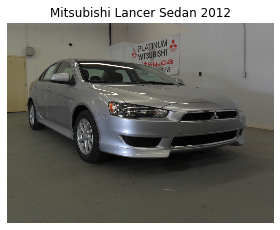

In [50]:
db.show_batch(rows=1)

In [51]:
learn = cnn_learner (db, models.densenet121, metrics=[error_rate, accuracy, top_k_accuracy])

In [52]:
learn.load('stage-2-densenet-151-14-epoch');

In [53]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 2048])

**Interpretation**

I wasn't expecting resnet50 to do nearly this well. 80.18% classification accuracy compare to 84% classification accuracy with the resnet152 architecture [here](https://github.com/morganmcg1/Projects/blob/master/stanford-cars/1_stanford_cars_basic.ipynb)

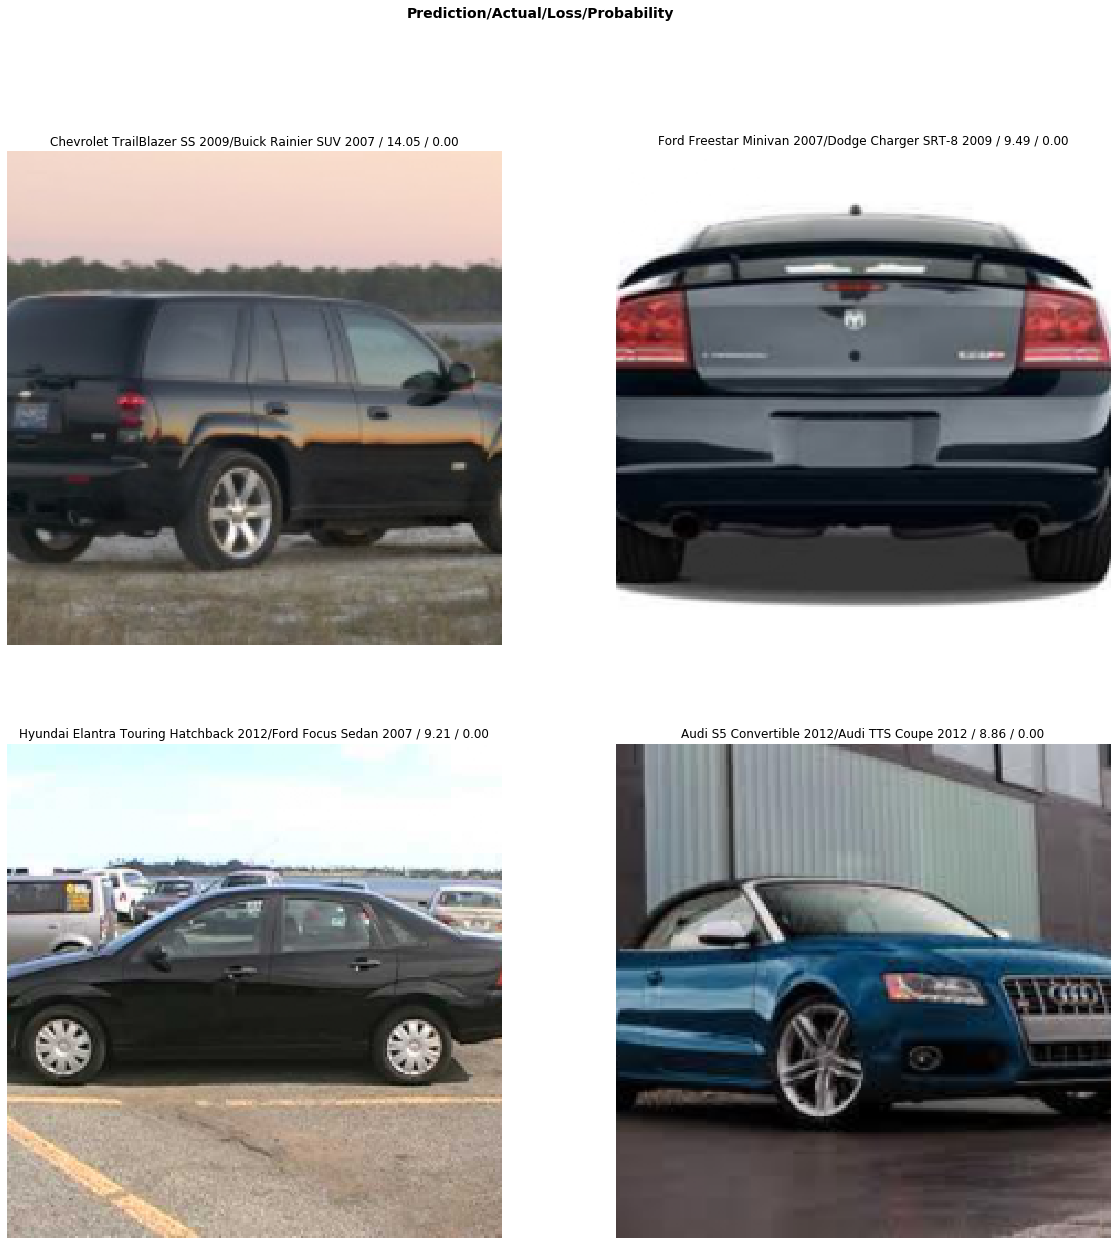

In [172]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4, figsize=(20,20))

In [173]:
most_confused = interp.most_confused()
most_confused

[('Bentley Continental GT Coupe 2012', 'Bentley Continental GT Coupe 2007', 6),
 ('Chevrolet Silverado 1500 Extended Cab 2012',
  'Chevrolet Silverado 1500 Hybrid Crew Cab 2012',
  6),
 ('Dodge Caliber Wagon 2007', 'Dodge Caliber Wagon 2012', 6),
 ('Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 5),
 ('Dodge Caliber Wagon 2012', 'Dodge Caliber Wagon 2007', 4),
 ('Audi S5 Coupe 2012', 'Audi A5 Coupe 2012', 3),
 ('Bentley Arnage Sedan 2009', 'Audi V8 Sedan 1994', 3),
 ('Bugatti Veyron 16.4 Coupe 2009', 'Bugatti Veyron 16.4 Convertible 2009', 3),
 ('HUMMER H2 SUT Crew Cab 2009', 'HUMMER H3T Crew Cab 2010', 3),
 ('Honda Accord Sedan 2012', 'Acura RL Sedan 2012', 3),
 ('Spyker C8 Convertible 2009', 'Spyker C8 Coupe 2009', 3),
 ('Aston Martin V8 Vantage Convertible 2012',
  'Aston Martin V8 Vantage Coupe 2012',
  2),
 ('Aston Martin Virage Convertible 2012',
  'Aston Martin V8 Vantage Convertible 2012',
  2),
 ('Audi 100 Sedan 1994', 'Audi V8 Sedan 1994', 2),
 ('Audi 100 Wagon 1994', 'Audi 100